In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from scipy.stats import skew

In [3]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv(r"C:\Users\Prem\Downloads\Copper_Set.xlsx - Result 1.csv")

In [4]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [6]:

# verify the number of unique values in each features

for i in list(df.columns):
    print(f"{i}:{df[i].nunique()}")

id:181671
item_date:252
quantity tons:181673
customer:1169
country:17
status:9
item type:7
application:30
thickness:594
width:1386
material_ref:16563
product_ref:33
delivery date:28
selling_price:9795


In [7]:
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [8]:
df.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.0


In [9]:
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce')

In [10]:
df['delivery_time_taken']=(df['item_date']-df['delivery date']).abs().dt.days

In [11]:
columns_to_convert_numeric = ["quantity tons", "customer","country", "application", "thickness", "width", "selling_price"]
for i in columns_to_convert_numeric:
  df[i]=pd.to_numeric(df[i],errors='coerce')


In [12]:
df.columns = df.columns.str.strip()

In [13]:
# Some rubbish values are present in ‘Material_ref’ which starts with ‘00000’ value which should be converted into null

df['material_ref'] = df['material_ref'].apply(lambda x: np.nan if str(x).startswith('00000') else x)
df.head(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,delivery_time_taken
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,91.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,NaN,1668701718,2021-04-01,1047.00,0.0
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,90.0


In [14]:
# material ref have more than 55% are null values and id have all are unique values. so we have drop both columns.

df.drop(columns=['id','item_date','delivery date','material_ref'], inplace=True)
df

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,delivery_time_taken
0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.00,91.0
1,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,1047.00,0.0
2,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,644.33,90.0
3,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,768.00,90.0
4,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,577.00,31.0
...,...,...,...,...,...,...,...,...,...,...,...
181668,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,591.00,1.0
181669,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,589.00,1.0
181670,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,619.00,1.0
181671,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,601.00,1.0


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,181672.0,5.874926e+03,2.349081e+06,-2000.00,1.097030e+01,3.036464e+01,6.716061e+01,1.000000e+09
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08
delivery_time_taken,181667.0,6.413128e+01,4.095861e+01,0.00,2.900000e+01,6.100000e+01,9.700000e+01,6.890000e+02


In [16]:
# Replace negative values in specific columns with NaN
columns_to_check = ['quantity tons','selling_price']
df[columns_to_check] = df[columns_to_check].applymap(lambda x: np.nan if x < 0 else x)

In [17]:
df.isnull().sum()

quantity tons           5
customer                1
country                28
status                  2
item type               0
application            24
thickness               1
width                   0
product_ref             0
selling_price           6
delivery_time_taken     6
dtype: int64

Filling null values with Median

In [18]:

df['quantity tons'].fillna(df['quantity tons'].median(), inplace=True)
df['thickness'].fillna(df['thickness'].median(), inplace=True)
df['width'].fillna(df['width'].median(), inplace=True)
df['selling_price'].fillna(df['selling_price'].median(), inplace=True)

Filling null values with Mode

In [19]:

df['customer'].fillna(df['customer'].mode()[0], inplace=True)
df['country'].fillna(df['country'].mode()[0], inplace=True)
df['status'].fillna(df['status'].mode()[0], inplace=True)
df['item type'].fillna(df['item type'].mode()[0], inplace=True)
df['application'].fillna(df['application'].mode()[0], inplace=True)
df['product_ref'].fillna(df['product_ref'].mode()[0], inplace=True)

df['delivery_time_taken'].fillna(df['delivery_time_taken'].mode()[0], inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   quantity tons        181673 non-null  float64
 1   customer             181673 non-null  float64
 2   country              181673 non-null  float64
 3   status               181673 non-null  object 
 4   item type            181673 non-null  object 
 5   application          181673 non-null  float64
 6   thickness            181673 non-null  float64
 7   width                181673 non-null  float64
 8   product_ref          181673 non-null  int64  
 9   selling_price        181673 non-null  float64
 10  delivery_time_taken  181673 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 15.2+ MB


In [21]:
df.isnull().sum()

quantity tons          0
customer               0
country                0
status                 0
item type              0
application            0
thickness              0
width                  0
product_ref            0
selling_price          0
delivery_time_taken    0
dtype: int64

In [22]:
df['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [23]:
df['item type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

Label encoding

In [24]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['status'] = label_encoder.fit_transform(df['status'])


In [25]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame
label_encoder = LabelEncoder()

# Fit and transform the 'item_type' column
df['item type'] = label_encoder.fit_transform(df['item type'])

# To see the mapping of categories to integers
item_type = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))


In [26]:
df['item type'].unique()

array([5, 6, 3, 1, 2, 0, 4])

In [27]:
df['status'].unique()

array([7, 0, 6, 1, 2, 8, 5, 4, 3])

Skewness Handling - Feature Scaling (Log Transformation)

In [28]:
#using encoding make a copy


object_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
object_data_cols

['quantity tons',
 'customer',
 'country',
 'application',
 'thickness',
 'width',
 'selling_price',
 'delivery_time_taken']

In [29]:
df1=df.copy()
df1.head()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,delivery_time_taken
0,54.151139,30156308.0,28.0,7,5,10.0,2.00,1500.0,1670798778,854.00,91.0
1,768.024839,30202938.0,25.0,7,5,41.0,0.80,1210.0,1668701718,1047.00,0.0
2,386.127949,30153963.0,30.0,7,6,28.0,0.38,952.0,628377,644.33,90.0
3,202.411065,30349574.0,32.0,7,3,59.0,2.30,1317.0,1668701718,768.00,90.0
4,785.526262,30211560.0,28.0,7,5,10.0,4.00,2000.0,640665,577.00,31.0


In [30]:
for col in object_data_cols:
    print(col)
    print(skew(df[col]))

quantity tons
424.68730994731504
customer
86.98459014421533
country
0.753083352867576
application
0.7245486374533386
thickness
303.4450657126513
width
0.37459367901082125
selling_price
301.38559968606967
delivery_time_taken
0.4697691643003945


In [31]:

# find outliers - box plot & skewed data - hist plot and violin plot

def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()
     

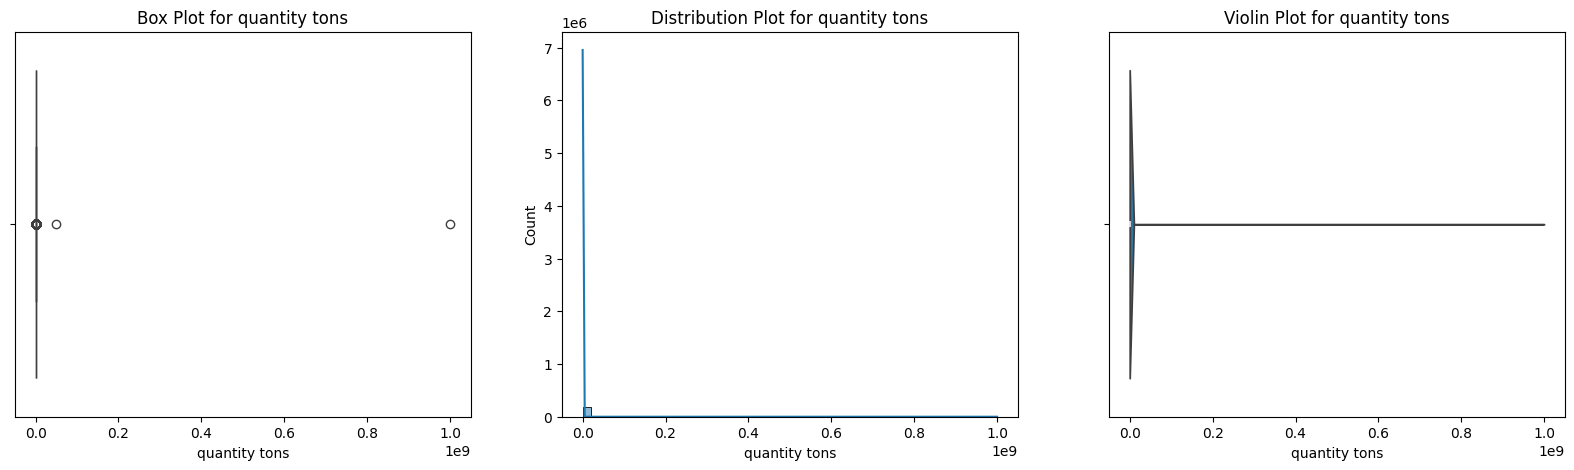

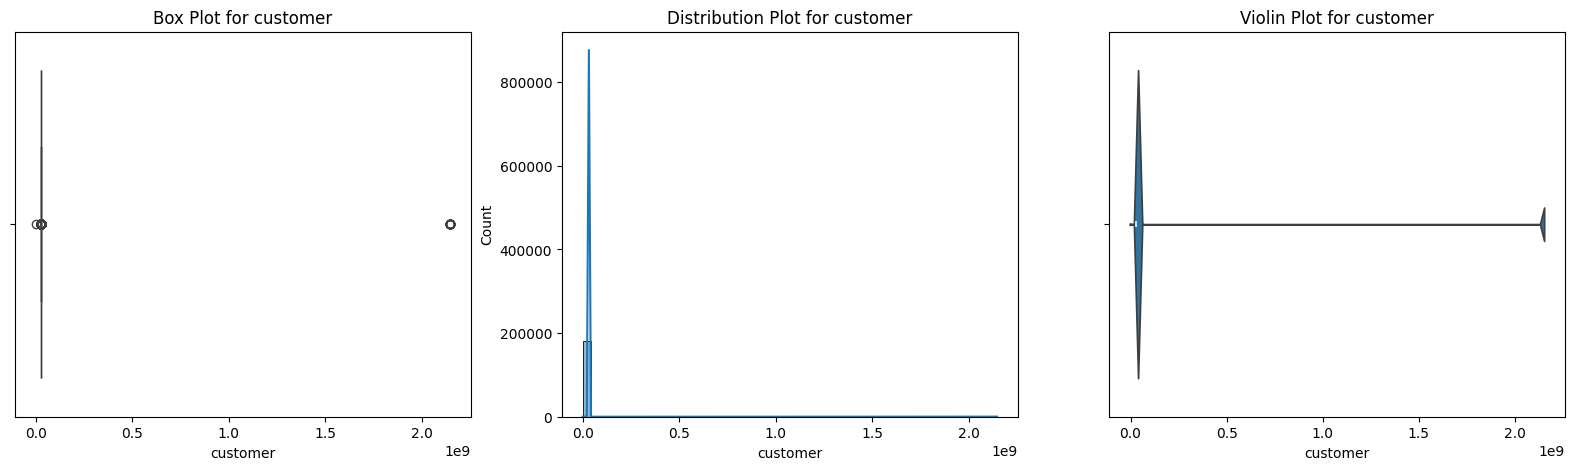

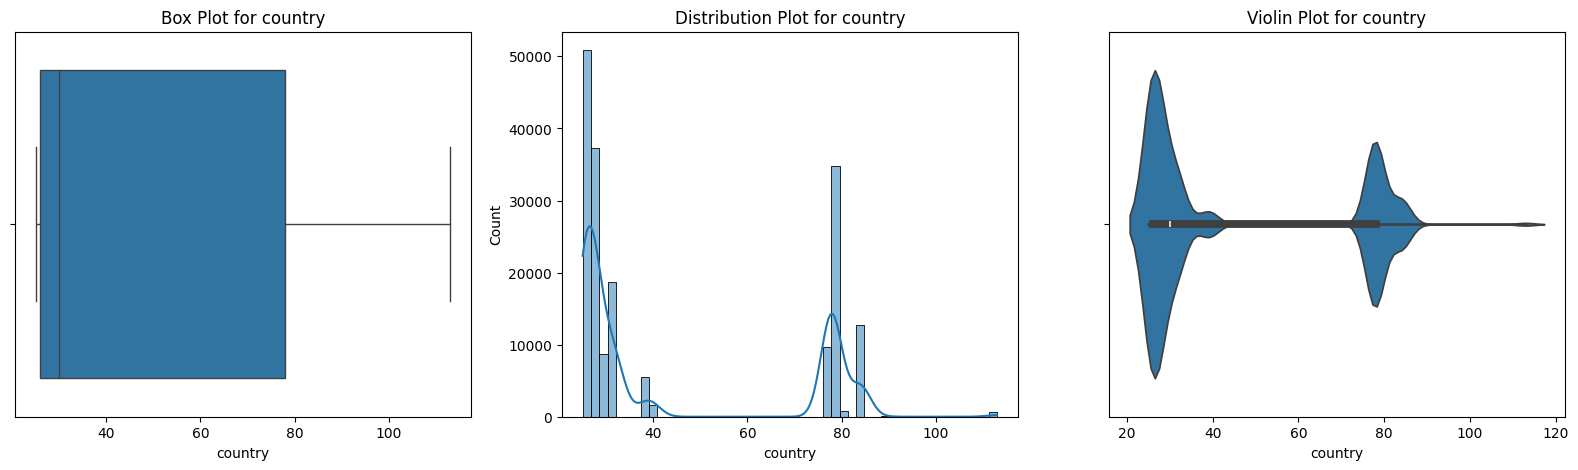

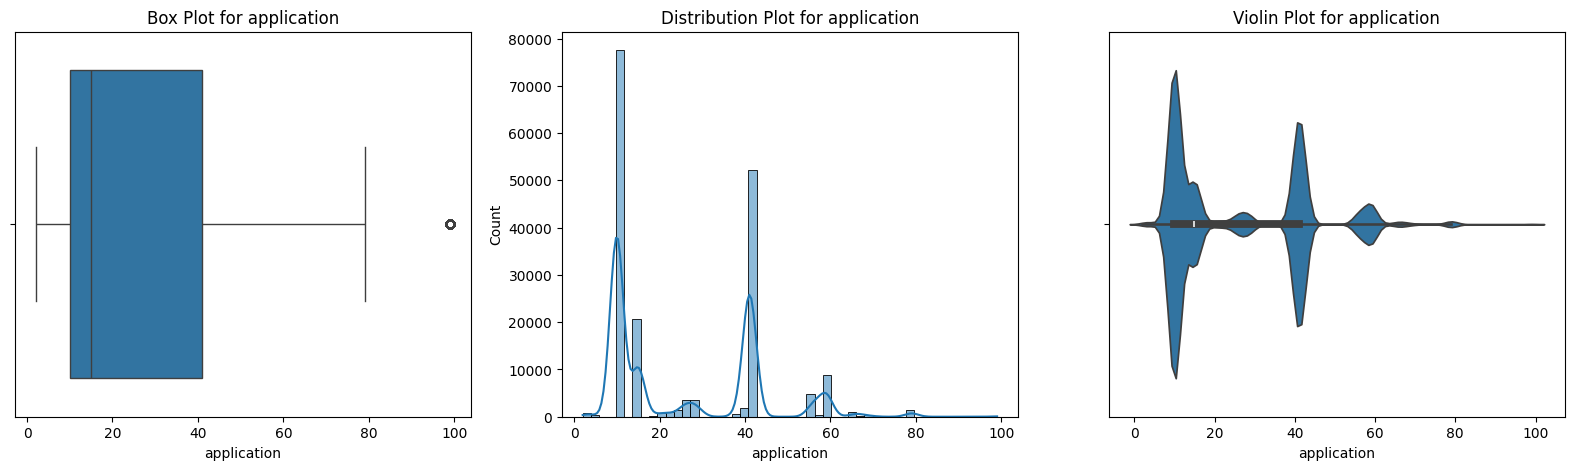

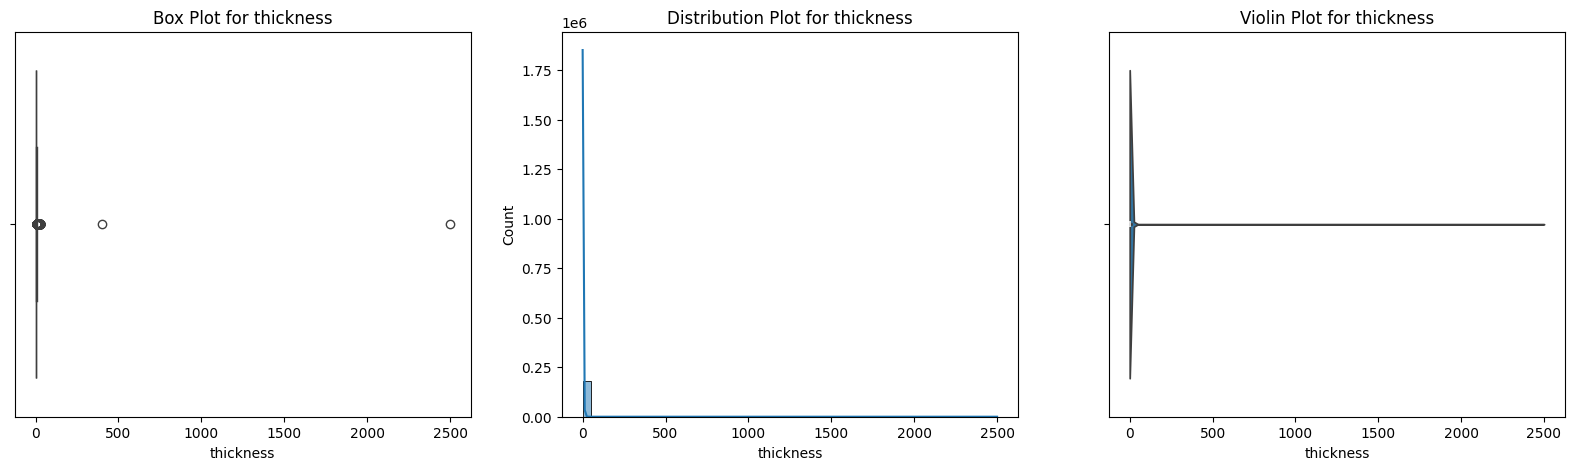

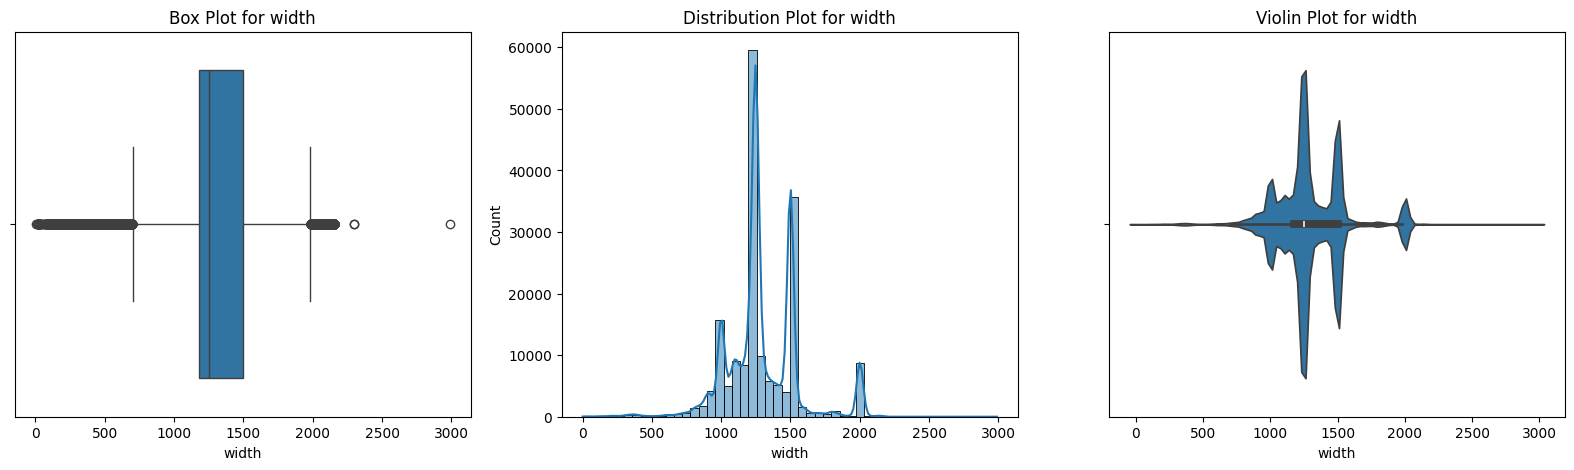

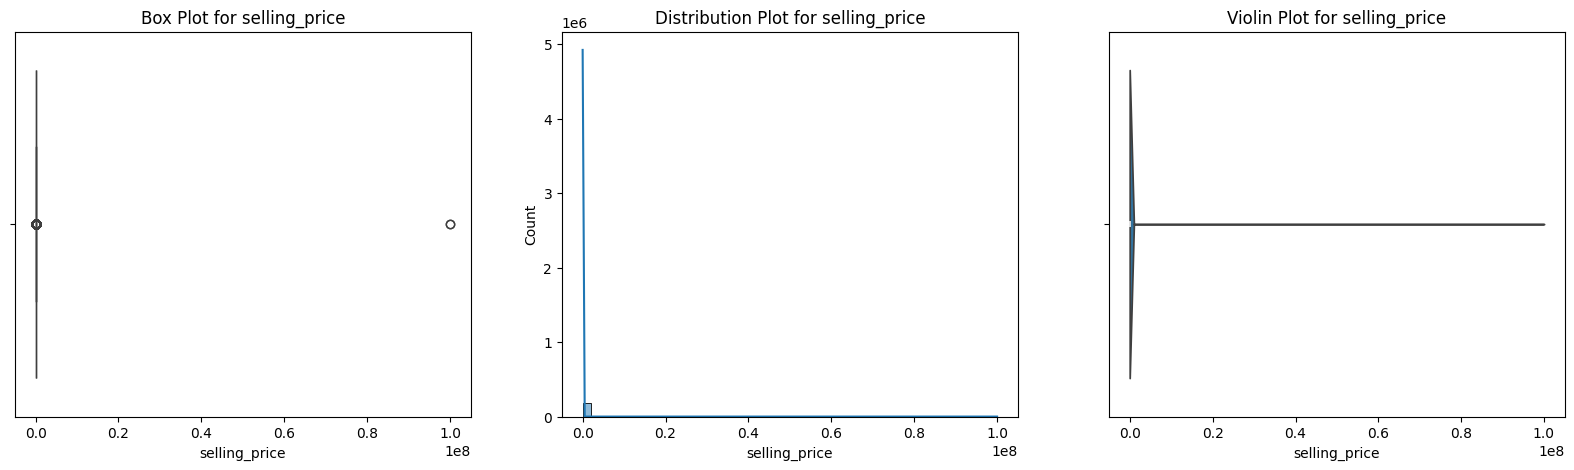

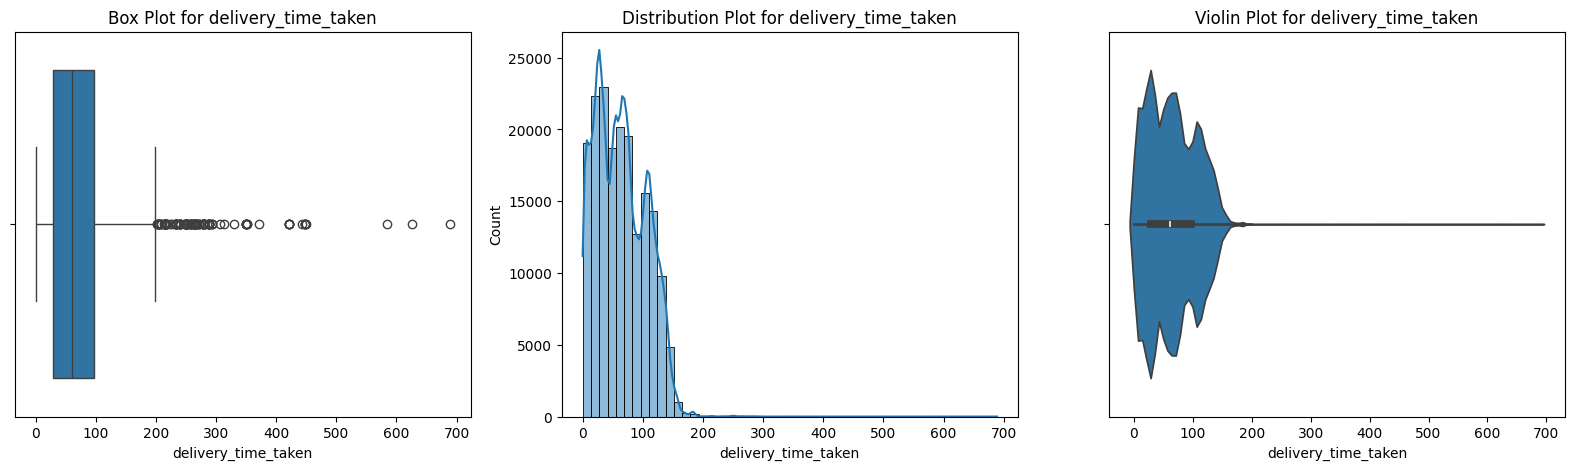

In [32]:
for i in object_data_cols:
    plot(df1, i)

In [33]:
# handling skew with log transformation method

df1['quantity_tons_log']=np.log(df1['quantity tons'])
df1['thickness_log']=np.log(df1['thickness'])
df1['selling_price_log']=np.log(df1['selling_price'])
df.head()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,delivery_time_taken
0,54.151139,30156308.0,28.0,7,5,10.0,2.00,1500.0,1670798778,854.00,91.0
1,768.024839,30202938.0,25.0,7,5,41.0,0.80,1210.0,1668701718,1047.00,0.0
2,386.127949,30153963.0,30.0,7,6,28.0,0.38,952.0,628377,644.33,90.0
3,202.411065,30349574.0,32.0,7,3,59.0,2.30,1317.0,1668701718,768.00,90.0
4,785.526262,30211560.0,28.0,7,5,10.0,4.00,2000.0,640665,577.00,31.0


In [34]:
df1.drop(columns=['quantity tons','thickness','selling_price'], inplace=True)
df1.head()

,customer,country,status,item type,application,width,product_ref,delivery_time_taken,quantity_tons_log,thickness_log,selling_price_log
0,30156308.0,28.0,7,5,10.0,1500.0,1670798778,91.0,3.991779,0.693147,6.749931
1,30202938.0,25.0,7,5,41.0,1210.0,1668701718,0.0,6.643822,-0.223144,6.953684
2,30153963.0,30.0,7,6,28.0,952.0,628377,90.0,5.956169,-0.967584,6.468211
3,30349574.0,32.0,7,3,59.0,1317.0,1668701718,90.0,5.310301,0.832909,6.643790
4,30211560.0,28.0,7,5,10.0,2000.0,640665,31.0,6.666354,1.386294,6.357842


In [35]:
#outliers handle with IQR and cliping method 

def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [36]:
# using outlier function handle the outliers for the below features

outlier(df1,'quantity_tons_log')
outlier(df1,'thickness_log')
outlier(df1,'selling_price_log')
outlier(df1,'width')
df1

,customer,country,status,item type,application,width,product_ref,delivery_time_taken,quantity_tons_log,thickness_log,selling_price_log
0,30156308.0,28.0,7,5,10.0,1500.0,1670798778,91.0,3.991779,0.693147,6.749931
1,30202938.0,25.0,7,5,41.0,1210.0,1668701718,0.0,6.643822,-0.223144,6.953684
2,30153963.0,30.0,7,6,28.0,952.0,628377,90.0,5.956169,-0.967584,6.468211
3,30349574.0,32.0,7,3,59.0,1317.0,1668701718,90.0,5.310301,0.832909,6.643790
4,30211560.0,28.0,7,5,10.0,1980.0,640665,31.0,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...
181668,30200854.0,25.0,7,5,41.0,1220.0,164141591,1.0,4.629691,-0.040822,6.381816
181669,30200854.0,25.0,7,5,41.0,1500.0,164141591,1.0,5.337954,-0.051293,6.378426
181670,30200854.0,25.0,7,5,41.0,1250.0,164141591,1.0,1.443523,-0.342490,6.428105
181671,30200854.0,25.0,7,5,41.0,1250.0,164141591,1.0,3.413291,-0.162519,6.398595


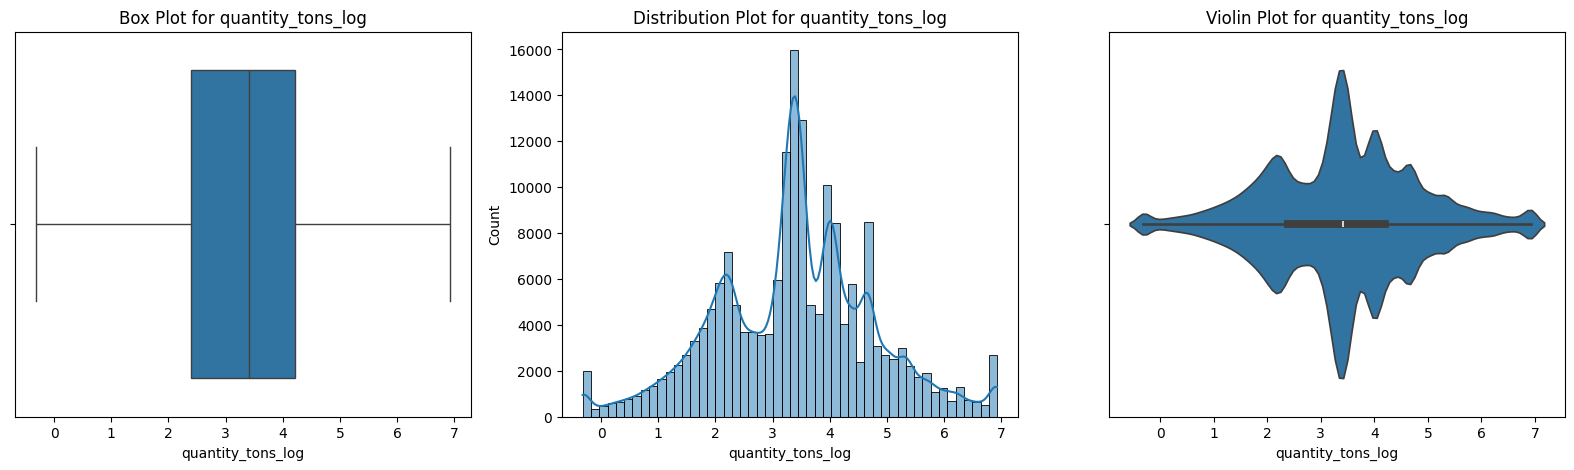

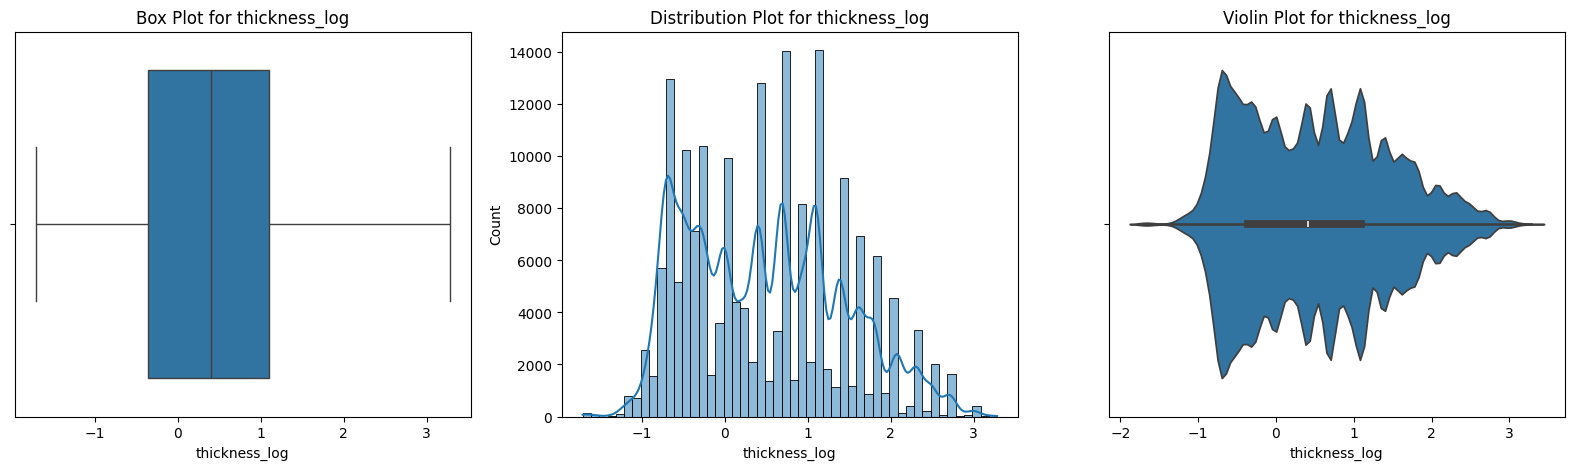

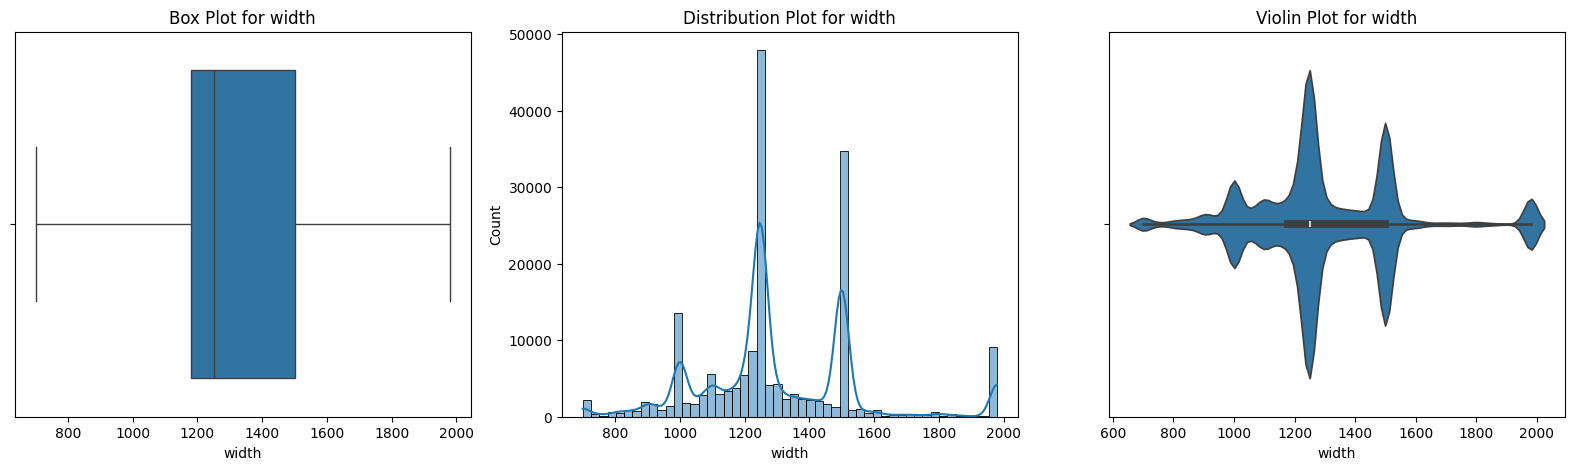

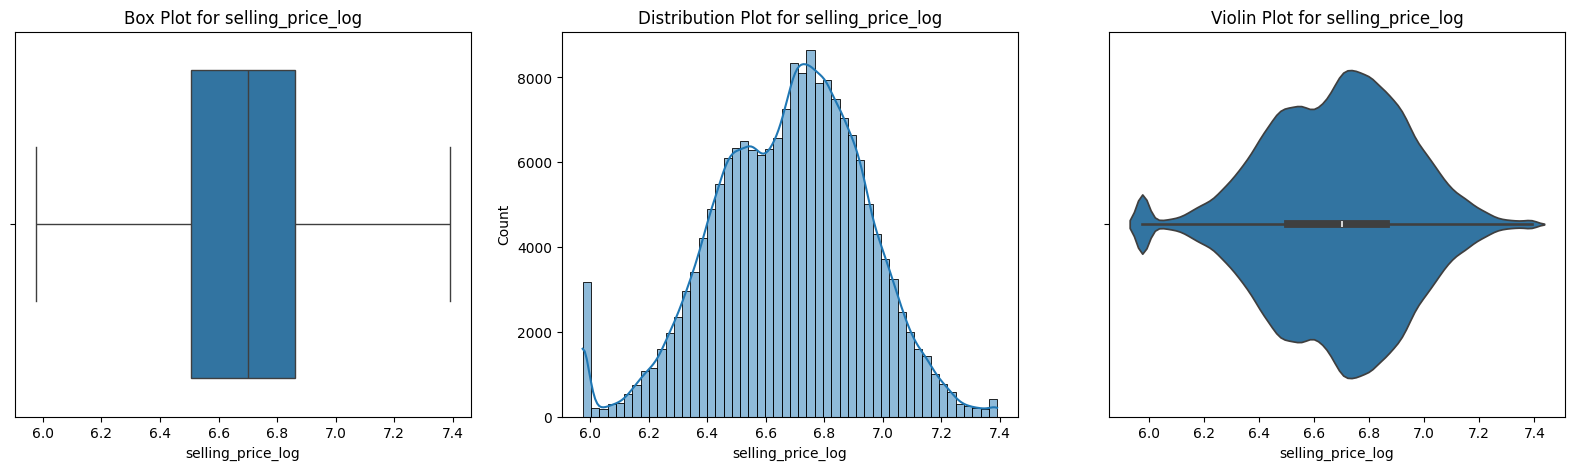

In [37]:
#plotting after skew and outliers 

for i in ['quantity_tons_log', 'thickness_log', 'width', 'selling_price_log']:
    plot(df1, i)

<Axes: >

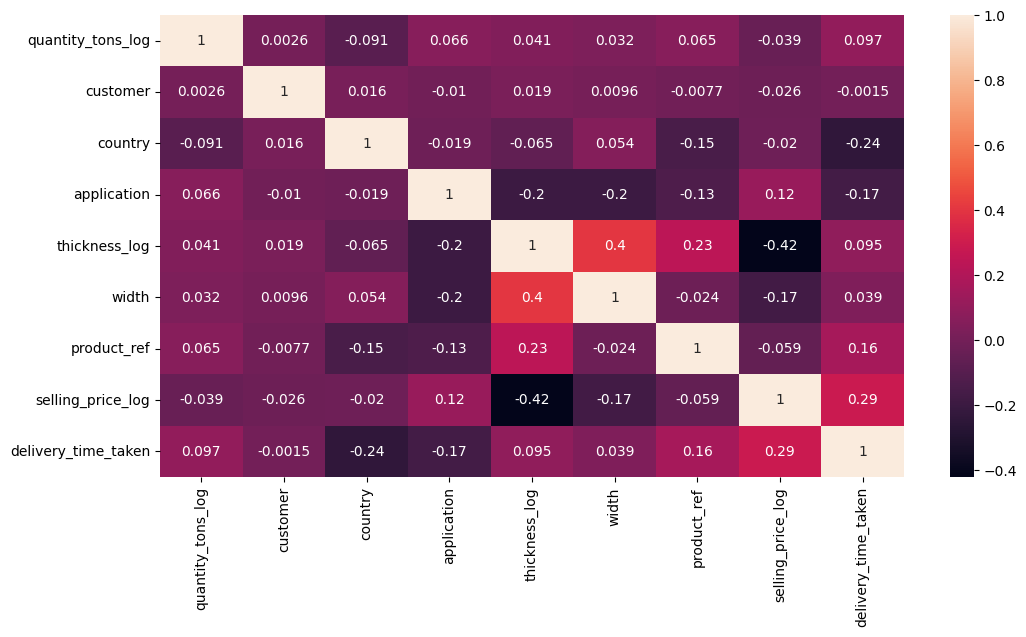

In [38]:
# verify any columns are highly correlated using Heatmap

cor=df1[['quantity_tons_log', 'customer', 'country', 'application', 'thickness_log', 'width','product_ref', 'selling_price_log','delivery_time_taken']].corr()

plt.figure(figsize=(12,6))
sns.heatmap(cor,annot=True)

In [39]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor


from sklearn import metrics
import numpy as np

import pickle

In [40]:
df2=df1.copy()
df2

,customer,country,status,item type,application,width,product_ref,delivery_time_taken,quantity_tons_log,thickness_log,selling_price_log
0,30156308.0,28.0,7,5,10.0,1500.0,1670798778,91.0,3.991779,0.693147,6.749931
1,30202938.0,25.0,7,5,41.0,1210.0,1668701718,0.0,6.643822,-0.223144,6.953684
2,30153963.0,30.0,7,6,28.0,952.0,628377,90.0,5.956169,-0.967584,6.468211
3,30349574.0,32.0,7,3,59.0,1317.0,1668701718,90.0,5.310301,0.832909,6.643790
4,30211560.0,28.0,7,5,10.0,1980.0,640665,31.0,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...
181668,30200854.0,25.0,7,5,41.0,1220.0,164141591,1.0,4.629691,-0.040822,6.381816
181669,30200854.0,25.0,7,5,41.0,1500.0,164141591,1.0,5.337954,-0.051293,6.378426
181670,30200854.0,25.0,7,5,41.0,1250.0,164141591,1.0,1.443523,-0.342490,6.428105
181671,30200854.0,25.0,7,5,41.0,1250.0,164141591,1.0,3.413291,-0.162519,6.398595


In [41]:
# function to choose the best algorithm

def best_ML_algorithm(df,algorithms):
        x=df.drop(columns=['selling_price_log'],axis=1)
        y=df['selling_price_log']

        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

        results={}

        for algorithm in algorithms:

                model=algorithm().fit(x_train,y_train)
                y_pred=model.predict(x_test)
                
                MAE=metrics.mean_absolute_error(y_test, y_pred)
                MSE=metrics.mean_squared_error(y_test, y_pred)
                RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
                r2 = metrics.r2_score(y_test, y_pred)

                results[algorithm.__name__] = {'Mean Absolute Error':MAE,'Mean Squared Error':MSE,'Root Mean Squared Error':RMSE,
                                        'R² score':r2}
                
        best_algorithm = max(results.items(), key=lambda item: item[1]['R² score'])[0]  
        
        return best_algorithm, results        

In [42]:
# using above function try to identify the best algorithm

algorithms = [LinearRegression, DecisionTreeRegressor, ExtraTreesRegressor, RandomForestRegressor,
            GradientBoostingRegressor, XGBRegressor]
best_algorithm, results = best_ML_algorithm(df2, algorithms)

results_df = pd.DataFrame(results).transpose()

print("**Evaluation Metrics for All Algorithms:**")
print(results_df.to_string())

print("**Best Algorithm:**",best_algorithm)

**Evaluation Metrics for All Algorithms:**
                           Mean Absolute Error  Mean Squared Error  Root Mean Squared Error  R² score
LinearRegression                      0.161698            0.044393                 0.210697  0.319540
DecisionTreeRegressor                 0.052915            0.009566                 0.097806  0.853372
ExtraTreesRegressor                   0.045124            0.005350                 0.073145  0.917992
RandomForestRegressor                 0.044917            0.005252                 0.072469  0.919502
GradientBoostingRegressor             0.115917            0.021004                 0.144927  0.678051
XGBRegressor                          0.079196            0.011185                 0.105760  0.828555
**Best Algorithm:** RandomForestRegressor


In [43]:
# hyper parameter tuning to identify the best parameter using gridsearch cv

x=df2.drop(columns=['selling_price_log'],axis=1)
y=df2['selling_price_log']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

param_grid = { 
    'n_estimators' :[100,150],
    'max_depth': [10,20],     
    'min_samples_split': [2,4], 
    'min_samples_leaf': [1,2],
    'max_features'    : ['sqrt', 'log2', None] }


grid_search = GridSearchCV(estimator=RandomForestRegressor(),
                            param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(x_train, y_train)

grid_search.best_params_,grid_search.best_score_

({'max_depth': 20,
  'max_features': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 150},
 0.8997563110217935)

In [44]:
# with best algorithm matching the parameter from above result and train the model

x=df2.drop(columns=['selling_price_log'],axis=1)
y=df2['selling_price_log']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model_regressor = RandomForestRegressor(n_estimators=150,max_features=None,max_depth=20,min_samples_leaf=1,min_samples_split=2,random_state=42)
model_regressor.fit(x_train, y_train)

y_pred = model_regressor.predict(x_test)

# evaluation metrics 
MAE=metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {MAE}")
print(f"Mean Squared Error: {MSE}")
print(f"Root Mean Squared Error: {RMSE}")
print(f"R-squared: {r2}")

Mean Absolute Error: 0.04834279182418458
Mean Squared Error: 0.0056517419334818275
Root Mean Squared Error: 0.07517806816806234
R-squared: 0.9133698954873922


In [45]:
#checkig the features scores and importants

feature_scores = pd.Series(model_regressor.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores

product_ref            0.294782
delivery_time_taken    0.244100
status                 0.191282
country                0.069647
customer               0.064021
thickness_log          0.042692
quantity_tons_log      0.037866
application            0.022650
item type              0.016539
width                  0.016422
dtype: float64

In [46]:
# store the model using pickle

with open('Regressor.pkl','wb') as files:
    pickle.dump(model_regressor,files)

In [47]:
#load the pickle and predict the selling price with regressor model

with open('Regressor.pkl','rb') as files:
    predict_model=pickle.load(files)

pre=predict_model.predict(np.array([[30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,91.0,3.991779,0.693147]]))
np.exp(pre[0])

746.2813768699426

Classifier Model to predict the Status

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc



In [49]:
#filter out the values (won|lost) in status column

df_c=df2[(df2.status==1)|(df2.status==0)]
df_c

,customer,country,status,item type,application,width,product_ref,delivery_time_taken,quantity_tons_log,thickness_log,selling_price_log
6,30209509.0,30.0,0,5,41.0,1125.0,611993,91.0,1.259203,-0.967584,5.975038
10,30209509.0,30.0,0,5,41.0,1125.0,611993,91.0,2.216566,-0.967584,5.975038
171,30223403.0,78.0,1,5,10.0,1500.0,1668701718,91.0,2.165480,0.000000,7.133296
174,30165992.0,77.0,1,3,10.0,1500.0,164141591,122.0,3.677655,0.000000,7.110696
175,30223403.0,78.0,1,5,10.0,1500.0,1668701718,91.0,2.438388,1.386294,7.078342
...,...,...,...,...,...,...,...,...,...,...,...
181527,30161559.0,30.0,1,3,10.0,1525.0,640665,30.0,4.156686,1.766442,6.124683
181529,30161559.0,30.0,1,3,10.0,1500.0,640665,30.0,4.025862,2.060514,6.126869
181531,30161559.0,30.0,1,3,10.0,1830.0,640665,30.0,5.328963,1.348073,6.131226
181533,30198408.0,25.0,1,3,10.0,1150.0,1668701718,1.0,4.634669,0.336472,6.586172


In [50]:
#checking balance of the status values

df_c['status'].value_counts()

status
1    34438
0     3140
Name: count, dtype: int64

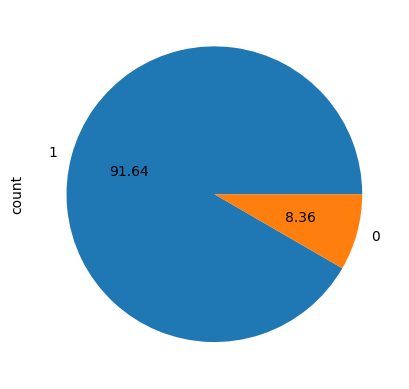

In [51]:
ax=df_c['status'].value_counts().plot.pie(autopct='%.2f')

Text(0.5, 1.0, 'over oversampling using smote')

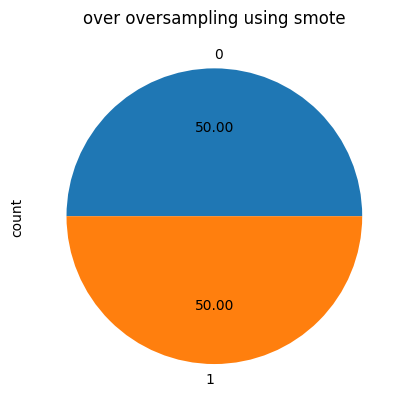

In [52]:
# oversampling the data using SMOTE 

x=df_c.drop('status',axis=1)
y=df_c['status']

smote= SMOTE()

x_smote, y_smote = smote.fit_resample(x,y) 

ax=y_smote.value_counts().plot.pie(autopct='%.2f')
ax.set_title('over oversampling using smote')

In [53]:
#function to get the best classifier algorithm

def best_ML_class_algo(x_smote,y_smote,algorithms):
        
        x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.3, random_state=42)

        results={}

        for algorithm in algorithms:

                model=algorithm().fit(x_train,y_train)
                y_pred=model.predict(x_test)

                accuracy =metrics. accuracy_score(y_test, y_pred)
                precision =metrics. precision_score(y_test, y_pred)
                recall =metrics. recall_score(y_test, y_pred)
                f1 = metrics.f1_score(y_test, y_pred)

                results[algorithm.__name__] = {'Accuracy score': accuracy,'Precision': precision,'Recall': recall,'F1-score': f1}
                
        best_algorithm = max(results.items(), key=lambda item: item[1]['Accuracy score'])[0]  
        
        return best_algorithm, results  

In [54]:
# using above function try to identify the best algorithm

algorithms = [ DecisionTreeClassifier, ExtraTreesClassifier, RandomForestClassifier,
            GradientBoostingClassifier, XGBClassifier]
best_algorithm, results = best_ML_class_algo(x_smote,y_smote, algorithms)

results_df = pd.DataFrame(results).transpose()

print("**Evaluation Metrics for All Algorithms:**")
print(results_df.to_string())

print("**Best Algorithm:**",best_algorithm)

**Evaluation Metrics for All Algorithms:**
                            Accuracy score  Precision    Recall  F1-score
DecisionTreeClassifier            0.999952        1.0  0.999902  0.999951
ExtraTreesClassifier              0.999952        1.0  0.999902  0.999951
RandomForestClassifier            0.999952        1.0  0.999902  0.999951
GradientBoostingClassifier        0.999952        1.0  0.999902  0.999951
XGBClassifier                     0.999661        1.0  0.999316  0.999658
**Best Algorithm:** DecisionTreeClassifier


In [55]:
# hyper parameter tuning to identify the best parameter using gridsearch cv

x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.3, random_state=42)

param_grid = {
    'n_estimators' :[50,100],
    'max_depth': [ 10,20,25],     
    'min_samples_split': [2, 4],  
    'min_samples_leaf': [1, 2]     }


model = ExtraTreesClassifier(random_state=42) 

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring="accuracy",n_jobs=-1)

grid_search.fit(x_train, y_train)

grid_search.best_params_,grid_search.best_score_

({'max_depth': 10,
  'min_samples_leaf': 2,
  'min_samples_split': 2,
  'n_estimators': 50},
 0.999979259566525)

In [56]:
# with best algorithm matching the parameter from bove result and train the model

x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.3, random_state=42)

model_classifier = ExtraTreesClassifier(n_estimators=100,max_depth=25,min_samples_leaf=1,min_samples_split=2)
model_classifier.fit(x_train, y_train)

y_pred = model_classifier.predict(x_test)

# evaluation metrics
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

[[10428     0]
 [    1 10234]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10428
           1       1.00      1.00      1.00     10235

    accuracy                           1.00     20663
   macro avg       1.00      1.00      1.00     20663
weighted avg       1.00      1.00      1.00     20663



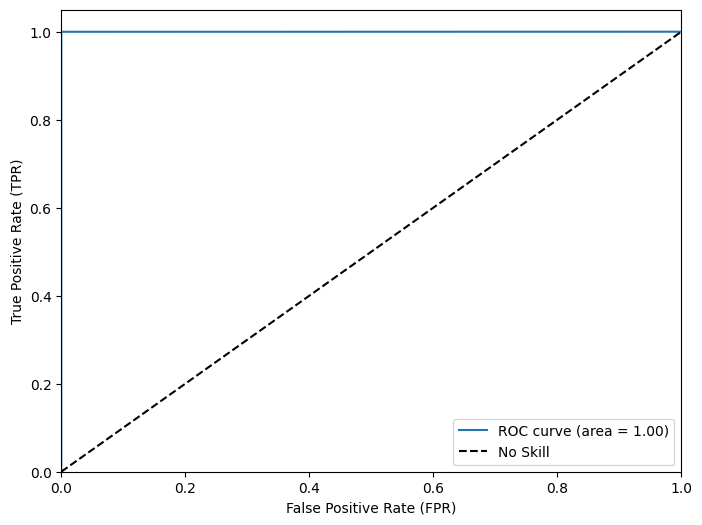

In [57]:
# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)

fpr, tpr, thresholds = roc_curve(y_test,y_pred)
auc_curve=auc(x=fpr,y=tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_curve)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc="lower right")
plt.show()

In [58]:
#checkig the features scores and importants

feature_scores = pd.Series(model_classifier.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores


selling_price_log      0.752371
application            0.055903
quantity_tons_log      0.039419
thickness_log          0.030877
product_ref            0.028721
item type              0.027849
country                0.026228
customer               0.016617
delivery_time_taken    0.012990
width                  0.009026
dtype: float64

In [62]:
# store the model using pickle

with open('Classifier.pkl','wb') as  files:
    pickle.dump(model_classifier,files)

In [64]:
# load the pickle and predict the status with classifier model

with open('Classifier.pkl','rb') as files:
    clas_model=pickle.load(files)

cla = clas_model.predict( np.array([[30156308.0,28.0,5.0,10.0,1500.0,1670798778,91.0,3.991779,0.693147,6.749931]]))
if cla[0] == 1:
    print('Won')
else:
    print('Lose')

Won
